# Lab 6: Stacking Regression Models

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In this lab assignment, you will:

1. Load the Airbnb "listings" data set.
2. Use the stacking ensemble method to train four regressors.
3. Train and evaluate the same four individual regressors.
4. Compare the performance of the stacked ensemble model to that of the individual models.

**<font color='red'>Note: Some of the code cells in this notebook may take a while to run.</font>**

## Part 1: Load the Data Set

We will work with a preprocessed version of the Airbnb NYC "listings" data set. 

<b>Task</b>: In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`.

You will be working with the file named "airbnb_readytofit.csv.gz" that is located in a folder named "data".

In [2]:
filename = os.path.join(os.getcwd(), "data", "airbnb_readytofit.csv.gz")
df = pd.read_csv(filename, header=0)

## Part 2: Create Training and Test Data Sets

So far, we mostly focused on classification problems. For this exercise, you will focus on a regression problem and predict a continuous outcome.

Your model will predict the price of a listing; the label is going to be 'price'.

### Create Labeled Examples 

<b>Task</b>: Create labeled examples from DataFrame `df`. 


In [3]:
y = df['price']
X = df.loc[:, df.columns != 'price']

### Split Labeled Examples Into Training and Test Sets

<b>Task</b>: In the code cell below, create training and test sets out of the labeled examples. 


    

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)

## Part 3: Use the Stacking Ensemble Method to Train Four Regression Models and Evaluate the Performance

You will use the scikit-learn `StackingRegressor` class. For more information, consult the online [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html).

First let's import `StackingRegressor`:

In [5]:
from sklearn.ensemble import StackingRegressor

In this part of the assignment, we will try to use four models jointly. In the code cell below, we creates a list of tuples, each consisting of a scikit-learn model function and the corresponding shorthand name that we choose:

In [6]:
estimators = [("DT", DecisionTreeRegressor()),
              ("RF", RandomForestRegressor()),
              ("GBDT", GradientBoostingRegressor()),
              ("LR", LinearRegression())
             ]

Let's train and evaluate this ensemble model using cross-validation:

<b>Task</b>: Call `StackingRegressor()`

In [7]:
stacking_model = StackingRegressor(estimators=estimators, cv=5, passthrough=False)

<b>Task</b>: Use scikit-learn's `cross_val_score()` function on the `stacking_model` model to obtain the 3-fold cross-validation RMSE scores. 

In [8]:
print('Performing Cross-Validation...')


rmse_avg = -1*cross_val_score(stacking_model, X_train, y_train, cv=3, scoring='neg_root_mean_squared_error')
rmse_avg = rmse_avg.mean()

print('End')
print('average score: {}'.format(rmse_avg))


Performing Cross-Validation...
End
average score: 0.6360072912990372


<b>Analysis</b>: 
1. Does the stacking model perform well? <br>
2. Which hyperparameters were used for each one of the models in the stack?<br>

Record your findings in the cell below.

The stacking model does perform well since we are trying to predict a continuous outcome. When analyzing the data in the price column, the average is around -0.6 <-> -0.7 if you were to take a glance. Hopefully, the other models will yield better results. 

## Part 4: Improve the Performance of the Ensemble Model

Assume that you decided to further improve your model by tuning a few of the hyperparameters and finding the best ones. Do not run the code cell below, but simply analyze the code:

In [ ]:
"""
params = {
    "DT__max_depth": [2, 4, 8],
    "GBDT__n_estimators":[100,300]
    
}

stack_grid = GridSearchCV(stacking, params, cv=3, verbose=4, scoring='neg_root_mean_squared_error', refit=True, n_jobs=-1)
stack_grid.fit(X_train, y_train)
print(stack_grid.best_params_)
rf_grid.cv_results_['mean_test_score']


print("best parameters:", rf_grid.best_params_)

rmse_stack_cv = -1*rf_grid.best_score_
print("[STACK] RMSE for the best model is : {:.2f}".format(rmse_stack_cv))

"""

Running the code above is computationally costly (you are welcome to do so on your own time as an ungraded activity). For this lab, we will simply give away the resulting values of the best hyperparameters:<br>
```{'DT__max_depth': 8, 'GBDT__n_estimators': 100}```

<b>Task</b>: Create a new version of the 'estimators' list. You will use the same four regressors, but this time, you will pass the `max_depth` value above to the decision tree model, and the `n_estimators` value above to the gradient boosted decision tree. Save the estimators list to the variable `estimators_best`.

In [10]:
estimators_best = [
    ("DT", DecisionTreeRegressor(max_depth=8)),
    ("RF", RandomForestRegressor()),
    ("GBDT", GradientBoostingRegressor(n_estimators=100)),
    ("LR", LinearRegression())
             ]

<b>Task</b>: Create a new `StackingRegressor` object with `estimators_best`. Name the model object `stacking_best_model`. Fit `stacking_best_model` to the training data.


In [11]:
print('Implement Stacking...')

stacking_best_model = StackingRegressor(estimators_best)
stacking_best_model.fit(X_train, y_train)

print('End')

Implement Stacking...
End


<b>Task:</b> Use the `predict()` method to test your ensemble model `stacking_best_model` on the test set (`X_test`). Save the result to the variable `stacking_best_pred`. Evaluate the results by computing the RMSE and R2 score. Save the results to the variables `rmse` and `r2`.

Complete the code in the cell below to accomplish this.

In [12]:
# 1. Use predict() to test use the fitted model to make predictions on the test data
stacking_best_pred = stacking_best_model.predict(X_test)

# 2. Compute the RMSE using mean_squared_error()
rmse = mean_squared_error(y_test, stacking_best_pred, squared=False)

# 3. Compute the R2 score using r2_score()
r2 = r2_score(y_test, stacking_best_pred)

print('Root Mean Squared Error: {0}'.format(rmse))
print('R2: {0}'.format(r2))                       

Root Mean Squared Error: 0.6211885237672377
R2: 0.6345094155159215


## Part 5: Fit and Evaluate Individual Regression Models

### a. Fit and Evaluate a Linear Regression

<b>Task:</b> Complete the code below to fit and evaluate a linear regression model:

In [13]:
# 1. Create the LinearRegression model object below and assign to variable 'lr_model'
lr_model = LinearRegression()

# 2. Fit the model to the training data below
lr_model.fit(X_train, y_train)

# 3.  Call predict() to use the fitted model to make predictions on the test data. Save the results to variable
# 'y_lr_pred'
y_lr_pred = lr_model.predict(X_test)

# 4: Compute the RMSE and R2 (on y_test and y_lr_pred) and save the results to lr_rmse and lr_r2
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 0.7449320705359715
[LR] R2: 0.4743911252247154


### b. Fit and Evaluate a Decision Tree 

Let's assume you already performed a grid search to find the best model hyperparameters for your decision tree. (We are omitting this step to save computation time.) The best values are: `max_depth=8`, and `min_samples_leaf = 50`. You will train a decision tree with these hyperparameter values.

<b>Task:</b> Complete the code in the cell below:

In [15]:

dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=50)
dt_model.fit(X_train, y_train)


y_dt_pred = dt_model.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))


[DT] Root Mean Squared Error: 0.7351179119606552
[DT] R2: 0.4881492359116725


### c. Fit and Evaluate a Gradient Boosted Decision Tree 

Let's assume you already performed a grid search to find the best model hyperparameters for your gradient boosted decision tree. (We are omitting this step to save computation time.) The best values are: `max_depth=2`, and `n_estimators = 300`. You will train a GBDT with these hyperparameter values.

<b>Task</b>: Complete the code in the cell below.

In [16]:
print('Begin GBDT Implementation...')

gbdt_model = GradientBoostingRegressor(max_depth=2, n_estimators=300)

gbdt_model.fit(X_train, y_train)


y_gbdt_pred = gbdt_model.predict(X_test)

gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('End')

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))                 




Begin GBDT Implementation...
End
[GBDT] Root Mean Squared Error: 0.6607699499872994
[GBDT] R2: 0.5864482008869281


### d. Fit and Evaluate  a Random Forest

Let's assume you already performed a grid search to find the best model hyperparameters for your random forest model. (We are omitting this step to save computation time.) The best values are: `max_depth=32`, and `n_estimators = 300`. 
You will train a random forest with these hyperparameter values.

<b>Task</b>: Complete the code in the cell below.

In [17]:
print('Begin RF Implementation...')

rf_model = RandomForestRegressor(max_depth=32, n_estimators=300)

rf_model.fit(X_train, y_train)

y_rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('End')

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))


Begin RF Implementation...
End
[RF] Root Mean Squared Error: 0.629124864487418
[RF] R2: 0.6251106993991455


## Part 6: Visualize Model Performance

The code cell below will plot the RMSE and R2 score for the stacked ensemble model and each regressor. 

<b>Task:</b> Complete the code in the cell below.

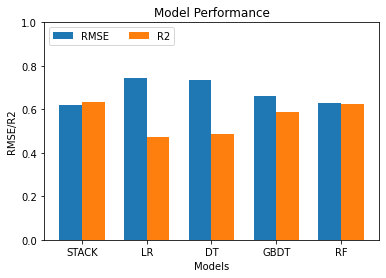

In [23]:
RMSE_Results = [rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [r2, lr_r2, dt_r2, gbdt_r2, rf_r2]
labels = ['STACK','LR', 'DT', 'GBDT', 'RF']

rg= np.arange(5)
width = 0.35

plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')

plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()


<b>Analysis</b>: Compare the performance of the stacking model with the individual models. Is the stacking model performing better?
Now that you are familiar with the Airbnb data, think about how a regression for price could be improved. What would you change, either at the feature engineering stage, or in the model selection, or at the stage of hyperparameter tuning?
Record your findings in the cell below.

When comparing the stacking model to the individual models, the stacking model is more accurate. A good r2 score is typically above 0.7, and the stack is the closest to that, while a sub 0.5 RMSE is suitable for a model where the stack is the most relative to that as well. When looking at the price data, it seems confusing due to the decimal numbers provided for the value. It makes it hard for humans to interpret what the data means. Other than that, there could be ways to change the hyperparameters to reveal better estimators.